/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in greater
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in less
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log10


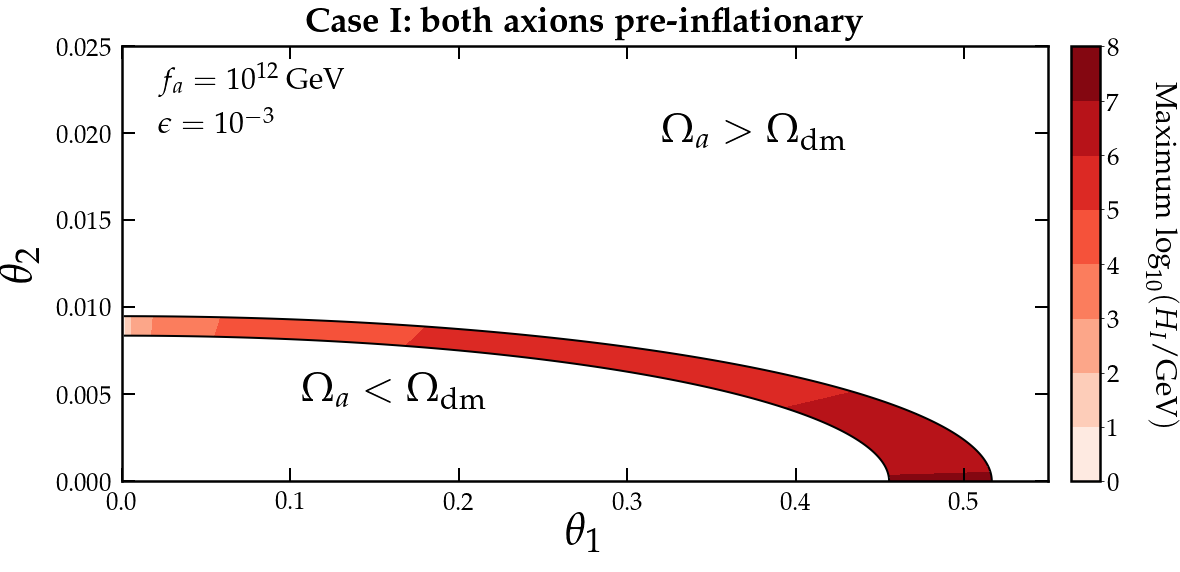

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from AxionFuncs import *
from matplotlib import colors as c
import cmasher as cmr

def Omega_a12(f,eps,k,theta_1,theta_2):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    rho1 = m1_T1*m1*theta_1**2*(f*1e9)**2*(T0/T1)**3*(g0/g1) # eV
    
    Omega1 = rho1/rho_c
    Omega2 = Omega1*(theta_2/theta_1)**2*k**((ni+2)/(2*(ni+4)))*eps**(-(ni+6)/(ni+4))
    return Omega1,Omega2

def LimTheta(f,eps,k,Omega_dm):
    Mpl_GeV = 2.4e18
    Mpl_MeV = Mpl_GeV*1e3
    T0 = 2.35e-4/1e6 # MeV
    g0 = 3.91
    g1 = 61.75
    ni = 6.68
    Tt = 103.0 # MeV

    dm_sq,m1,m2,tan_2alpha = Parameters(f,eps)

    T1 = ((m1/1e6)*Mpl_MeV*sqrt(90)/(3*pi*sqrt(61.75)))**(2/(ni+4))*Tt**(ni/(ni+4))

    rho_c = 8.06e-11 # eV^4

    m1_T1 = m1*(Tt/T1)**(ni/2) # eV

    F = (m1_T1*m1*(f*1e9)**2*(T0/T1)**3*(g0/g1))
    
    theta_1_max = sqrt(Omega_dm*rho_c/F)
    theta_2_max = sqrt(Omega_dm*rho_c/(F*k**((ni+2)/(2*(ni+4)))*eps**(-(ni+6)/(ni+4))))
    return theta_1_max,theta_2_max

n = 100

k = 0.6
f = 1e12
eps = 1e-3
theta_1 = linspace(0,0.55,500)
theta_2 = linspace(0,0.025,500)
TH1,TH2 = meshgrid(theta_1,theta_2)
Omega1,Omega2 = Omega_a12(array([f]),array([eps]),k,TH1,TH2)

theta_1_max,theta_2_max = LimTheta(array([f]),array([eps]),k,0.12+0.015)
theta_1_min,theta_2_min = LimTheta(array([f]),array([eps]),k,0.12-0.015)


fig,ax = MySquarePlot(r'$\theta_1$',r'$\theta_2$',size_x=20,size_y=8)
Omega = Omega1+Omega2

beta = 0.038
A_s = 2e-9
H_I = sqrt(beta*A_s)*pi*f*TH1/(1+eps**-2*TH2**2/TH1**2)**0.5

H_I[Omega>0.12+0.015] = nan
H_I[Omega<0.12-0.015] = nan

plt.gcf().text(0.25,0.25,r'$\Omega_a < \Omega_{\rm dm}$',fontsize=40)
plt.gcf().text(0.5,0.7,r'$\Omega_a > \Omega_{\rm dm}$',fontsize=40)
plt.gcf().text(0.40,0.46,r'$\Omega_a = \Omega_{\rm dm}$',fontsize=35,color='w',rotation=-13)

plt.gcf().text(0.15,0.8,'$f_a = 10^{12}$ GeV',fontsize=30)
plt.gcf().text(0.15,0.73,'$\epsilon = 10^{-3}$',fontsize=30)

plt.contour(theta_1,theta_2,Omega,colors='k',linewidths=2,linestyles='-',levels=[0.12-0.015])
plt.contour(theta_1,theta_2,Omega,colors='k',linewidths=2,linestyles='-',levels=[0.12+0.015])
im = plt.contourf(theta_1,theta_2,log10(H_I),cmap=cm.Reds,levels=arange(0,9,1))
plt.colorbar(im,pad=0.02,aspect=15)
plt.gcf().text(0.832,0.23,r'Maximum $\log_{10}(H_I/{\rm GeV})$',rotation=-90,fontsize=30,color='w')
plt.gcf().text(0.83,0.23,r'Maximum $\log_{10}(H_I/{\rm GeV})$',rotation=-90,fontsize=30)
plt.title(r'{\bf Case I: both axions pre-inflationary}',fontsize=35,pad=15)
MySaveFig(fig,'ThetaAngles')
